In [1]:
!pip install pandas matplotlib zarr fsspec s3fs intake intake_xarray intake_parquet

In [2]:
import intake
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "sans"
plt.rcParams["font.size"] = 8

First let's take a look at the top level shots. In this table we can find all of the metadata we have about particular shots.

In [3]:
catalog  = intake.open_catalog('https://mastapp.site/intake/catalog.yml')
shots_df = catalog.index.level1.shots().read()
shots_df

,url,preshot_description,postshot_description,campaign,current_range,divertor_config,plasma_shape,comissioner,facility,shot_id,...,cpf_vol_ipmax,cpf_vol_max,cpf_vol_truby,cpf_wmhd_ipmax,cpf_wmhd_max,cpf_wmhd_truby,cpf_zeff_ipmax,cpf_zeff_max,cpf_zeff_truby,cpf_zmag_efit
0,s3://mast/level1/shots/11695.zarr,\n0.1T TF SHOT\n,\nOK\n,M5,None,Conventional,None,None,MAST,11695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s3://mast/level1/shots/11696.zarr,\nSTANDARD 0.3T TF SHOT\n,\nOK\n,M5,None,Conventional,None,None,MAST,11696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3://mast/level1/shots/11697.zarr,\nRAISE TO 0.5T\n,"\nOK, ALARMS ARE LOWER\n",M5,None,Conventional,None,None,MAST,11697,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s3://mast/level1/shots/11698.zarr,\nRAISE TO .56T\n,\nSTILL ALARMS BUT LOWER AGAIN\n,M5,None,Conventional,None,None,MAST,11698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s3://mast/level1/shots/11699.zarr,\nRAISE TO .58T\n,\nOK\n,M5,None,Conventional,None,None,MAST,11699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15916,s3://mast/level1/shots/30467.zarr,\nRepeat with new neutron camera position.\ncH...,\nTwo times lower DD neutron rate than referen...,M9,700 kA,Conventional,Connected Double Null,None,MAST,30467,...,9.029202,9.046394,0.0,49469.122469,52653.445,0.0,NaN,NaN,NaN,0.013202
15917,s3://mast/level1/shots/30468.zarr,\nRepeat with new neutron camera position.\ncH...,\nGood beam.\nGood repeat.\n,M9,700 kA,Conventional,Lower Single Null,None,MAST,30468,...,9.102411,9.107017,0.0,48516.962675,49382.133,0.0,NaN,NaN,NaN,0.012445
15918,s3://mast/level1/shots/30469.zarr,\nRepeat with increased beam power (74 kV)\ncH...,\nGood shot. Modes present.\n,M9,700 kA,Conventional,Connected Double Null,None,MAST,30469,...,8.988730,9.047923,0.0,47466.249616,49115.805,0.0,NaN,NaN,NaN,0.015299
15919,s3://mast/level1/shots/30470.zarr,\nRepeat last using hydrogen in outboard and c...,\nNo HF gas.\n,M9,700 kA,Conventional,None,None,MAST,30470,...,9.687049,10.055509,0.0,17290.432865,22310.516,0.0,NaN,NaN,NaN,0.015164


# Thomson Scattering Data
This notebook contains some examples of loading and plotting Thomson scattering data.

First we can have a look at how many thompson scattering sources are in the database:

In [4]:
catalog  = intake.open_catalog('https://mastapp.site/intake/catalog.yml')
sources_df = catalog.index.level1.sources().read()

# Can also use name == 'aye' for thompson scattering edge data.
sources_df = sources_df.loc[(sources_df.name == 'ayc')]
sources_df

,description,quality,uuid,shot_id,name,url
163486,Core Thomson scattering data,Not Checked,a61fdefa-e7e9-57df-a7f3-a341f737bcdd,23001,ayc,s3://mast/level1/shots/23001.zarr/ayc
163689,Core Thomson scattering data,Not Checked,a654a084-97f5-52f5-99d6-4e726880b39a,23018,ayc,s3://mast/level1/shots/23018.zarr/ayc
164159,Core Thomson scattering data,Not Checked,3cca7bc2-9c91-5bd9-a1cd-939142a84cd2,23133,ayc,s3://mast/level1/shots/23133.zarr/ayc
164189,Core Thomson scattering data,Not Checked,6fd9ab2f-ca5f-57a2-ba81-589cf6efe7d5,23135,ayc,s3://mast/level1/shots/23135.zarr/ayc
164204,Core Thomson scattering data,Not Checked,5334374c-8f9a-5437-aa56-822448ea5d27,23136,ayc,s3://mast/level1/shots/23136.zarr/ayc
...,...,...,...,...,...,...
307980,Core Thomson scattering data,Not Checked,1d345219-99c7-5725-9d65-2c9d455b629c,30467,ayc,s3://mast/level1/shots/30467.zarr/ayc
308015,Core Thomson scattering data,Not Checked,9ac2f540-8845-5c5a-8932-7634b7834d40,30468,ayc,s3://mast/level1/shots/30468.zarr/ayc
308050,Core Thomson scattering data,Not Checked,d07dc339-1510-525c-9fa9-015900101656,30469,ayc,s3://mast/level1/shots/30469.zarr/ayc
308085,Core Thomson scattering data,Not Checked,fa9b2d5d-348b-5e00-a4d5-fc5e39d75452,30470,ayc,s3://mast/level1/shots/30470.zarr/ayc


Let's look at the data for a particular shot. Here we are going to use shot 30420 as an example. Below we get the url for the `ayc` data.

In [5]:
shot_id = 30420
url = sources_df.loc[sources_df.shot_id == shot_id].iloc[0].url
url

's3://mast/level1/shots/30420.zarr/ayc'

### Thomson Scattering Data

`ayc` source holds the Thomson Scattering data at the core. Thomson scattering diagnostics provide accurate measurements of electron temperature and density.

In [6]:
dataset = catalog.level1.sources(url=url)
dataset = dataset.to_dask()

dataset

/opt/homebrew/anaconda3/envs/mast-book/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 1MB
Dimensions:              (acqiris_time: 73, radial_index: 131, arb: 130,
                          time: 73, spectral_index: 4, instrument_time: 20,
                          time_segment: 73, xyc_time: 73)
Coordinates:
  * acqiris_time         (acqiris_time) float32 292B 0.0 1.0 2.0 ... 71.0 72.0
  * arb                  (arb) float32 520B 0.0 1.0 2.0 ... 127.0 128.0 129.0
  * instrument_time      (instrument_time) float32 80B 1.0 2.0 3.0 ... 19.0 20.0
  * radial_index         (radial_index) float32 524B 0.0 1.0 2.0 ... 129.0 130.0
  * spectral_index       (spectral_index) float32 16B 1.0 2.0 3.0 4.0
  * time                 (time) float32 292B 0.004166 0.008332 ... 0.3 0.3042
  * xyc_time             (xyc_time) float32 292B 0.0 1.0 2.0 ... 70.0 71.0 72.0
Dimensions without coordinates: time_segment
Data variables: (12/36)
    acqiris_time_        (acqiris_time) float32 292B dask.array<chunksize=(73,), meta=np.ndarray>
    angle                (radial_index) float32 524B dask.array<chunksize=(131,), meta=np.ndarray>
    aspectra             (time, radial_index, spectral_index) float32 153kB dask.array<chunksize=(73, 131, 4), meta=np.ndarray>
    chi2                 (time, radial_index) float32 38kB dask.array<chunksize=(73, 131), meta=np.ndarray>
    covariance_ne_te     (time, radial_index) float32 38kB dask.array<chunksize=(73, 131), meta=np.ndarray>
    instrument_dr        (instrument_time, radial_index) float32 10kB dask.array<chunksize=(20, 131), meta=np.ndarray>
    ...                   ...
    te_error             (time, radial_index) float32 38kB dask.array<chunksize=(73, 131), meta=np.ndarray>
    version_fibre        float32 4B ...
    version_poly         float32 4B ...
    version_raman        float32 4B ...
    xyc_time_            (xyc_time) float32 292B dask.array<chunksize=(73,), meta=np.ndarray>
    yag_nelint           (time) float32 292B dask.array<chunksize=(73,), meta=np.ndarray>
Attributes:
    description:  Core Thomson scattering data
    file_name:    ayc0304.20
    format:       IDA3
    mds_name:     None
    name:         ayc
    quality:      Not Checked
    shot_id:      30420
    signal_type:  Analysed
    source:       ayc
    uda_name:     AYC
    uuid:         8d043ece-8bf8-5af8-87e4-d2a1b01716fa
    version:      0

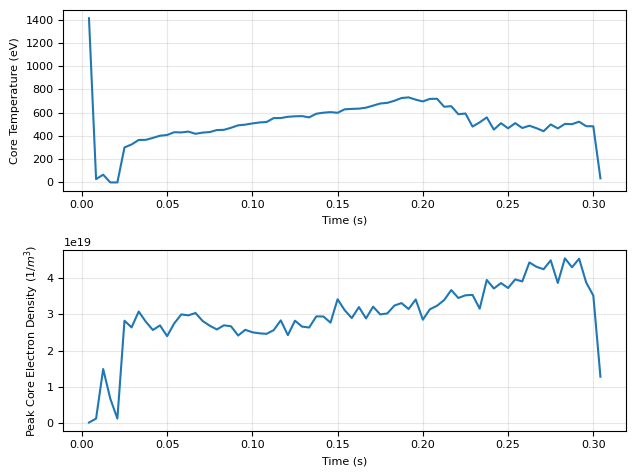

In [7]:
fig, axes = plt.subplots(2,1)
ax1, ax2 = axes

ax1.plot(dataset['time'], dataset['te_core'])
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Core Temperature (eV)')

ax2.plot(dataset['time'], dataset['ne_core'])
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Peak Core Electron Density ($1 / m^3$)')

for ax in axes:
    ax.grid(alpha=0.3)

plt.tight_layout()

### 2D Thomson Profiles

The dataset also includes 2D Thomson scattering profles as a function of time and angle/distance.

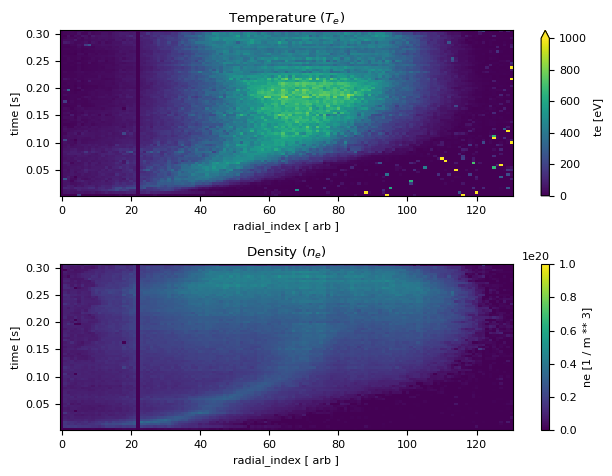

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1)
dataset = catalog.level1.sources(url=url)
dataset = dataset.to_dask()

tmax = dataset['te_core'].dropna(dim='time').time.max()

ds = dataset.copy()

te = ds['te']
te = te.sel(time=te.time <= tmax)
te = te.fillna(0)
te.plot.imshow(ax=ax1, vmax=1000)
ax1.set_title('Temperature ($T_e$)')

ne = ds['ne']
ne = ne.sel(time=ne.time <= tmax)
ne = ne.fillna(0)
ne.plot.imshow(ax=ax2, vmax=1e20)
ax2.set_title('Density ($n_e$)')

ax1.grid(False)
ax2.grid(False)
plt.tight_layout()